# Simple Scatter Plots
---------------

Another commonly used plot type is the simple scatter plot.
Instead of points being joined by line segments (as withline plot), here the points are represented individually with a dot, circle, or other shape.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

#### 1. Scatter Plots with ``plt.plot``
---------------

* ``plt.plot``/``ax.plot`` can produce scatter plots as well:

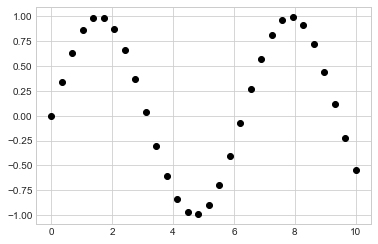

In [2]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

* The third argument in the function call is a character that represents the type of symbol used for the plotting.
* as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes(full list of available symbols can be seen in the documentation of ``plt.plot``)

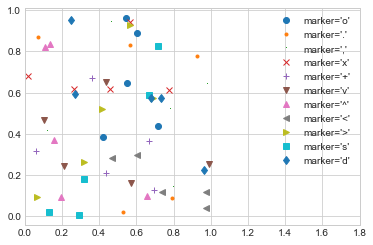

In [3]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label=f"marker='{marker}'")
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

* These character codes can be used together with line and color codes to plot points along with a line connecting them:

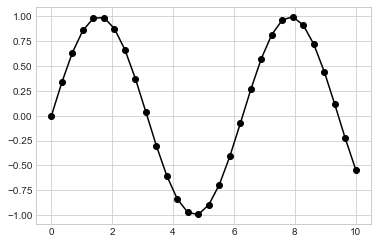

In [4]:
plt.plot(x, y, '-ok');

* Additional keyword arguments to ``plt.plot`` specify a wide range of properties of the lines and markers:

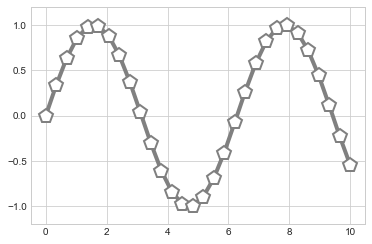

In [5]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

#### 2. Scatter Plots with ``plt.scatter``
------------

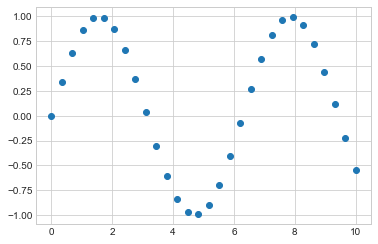

In [6]:
plt.scatter(x, y, marker='o');

* The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Creating a random scatter plot with points of many colors and sizes;  ``alpha`` adjusts the transparency level:

In [ ]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

In [ ]:
help(plt.scatter)

* color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command)
* size argument is given in pixels

The color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

For example, we might use the **Iris data** from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its **petals** and **sepals** carefully measured:

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

In [ ]:
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);
plt.colorbar(); 

In [ ]:
iris.target

Scatter plot has given us the ability to simultaneously explore **four different dimensions** of the data:
* (x, y) location of each point corresponds to the sepal length and width
* size of the point is related to the petal width
* color is related to the particular species of flower.
Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

#### 3. ``plot`` Versus ``scatter``: A Note on Efficiency
----------------

When datasets get larger than a few thousand points, ``plt.plot`` can be noticeably more efficient than ``plt.scatter``:
* ``plt.scatter`` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.
* ``plt.plot`` -- the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.
* For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.